In [265]:
import json 
import pandas as pd
from dateutil.parser import parse
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Luriv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Luriv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Text(0.5, 1.0, 'Sentiment Tweeter')

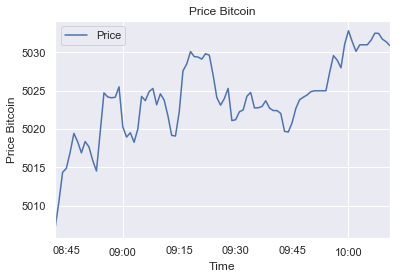

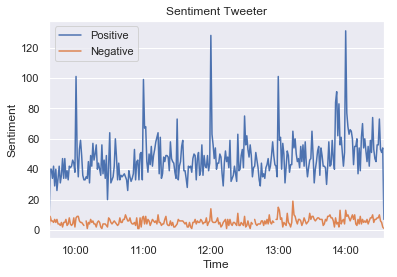

In [266]:
#read txt file from live tweets
filename='C:/Users/Luriv/Documents/textmininpro/Text_Mining_MASTER/twitter-out.txt'
with open(filename) as f:
    data = f.readlines()
    
#add into a dataframe eliminating data without time stamp
list_=[]
for n, line in enumerate(data, 1):
    if len(line)==4:
        pass
    else:
        x=line.rstrip()
        x=x.split("|")
        list_.append(x)

# add data into a dataframe adding one columns date and other sentiment
df_1 = pd.DataFrame(list_)
df_1=df_1.rename(columns={0: 'Timestamp', 1: 'Sentiment'})
#droping nan values
df_1 = df_1.dropna(how='any',axis=0)
    
# transform date same format dataframe that contain stream of bitcoin price and tweeter streanm


time_=[]
for date in df_1["Timestamp"]:  
    dt = parse(date)
    #remplacing second and milisecond in 0 for grouping
    dt= dt.replace(microsecond=0,second=0)
    time_.append(dt)

#adding a new column with datetime format equal
df_1['dateformat']=time_

#sorting dates
df_1 = df_1.sort_values(by='dateformat')

#dataframe live bitcoin stream
with open("data.json", "r") as read_it: 
     data = json.load(read_it) 

# add json file into a dataframe
df_bitlive = pd.DataFrame(data)
#selecting columns that we have to delete
columns = ['best_ask', 'best_bid', 'channels', 'high_24h', 'last_size', 'low_24h','open_24h', 'product_id', 'sequence',
       'trade_id', 'type', 'volume_24h', 'volume_30d']
#deleting all columns that are not useful
df_bitlive.drop(columns, inplace=True, axis=1)   
#delete all nan values
df_bitlive = df_bitlive.dropna(how='any',axis=0)
#filtering only buying prices
df_bitlive[df_bitlive["side"]=="buy"]

#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
#parsing date for have same datetime format
time_=[]
for date in df_bitlive["time"]:  
    dt_ = parse(date)
    #replace milisecond and second by 0 for grouping
    dt_= dt_.replace(microsecond=0,second=0)
    time_.append(dt_)
#creating new column with datetimne equal
df_bitlive['dateformat']=time_
#sorting values by date
df_bitlive = df_bitlive.sort_values(by='dateformat')
#change format of price to numeric
df_bitlive['price']=pd.to_numeric(df["price"])
#filtering only buying prices
df_bitlive=df_bitlive[df_bitlive["side"]=="buy"]

#plotting a pivot table of prices by date



pd.pivot_table(df_bitlive,index=['dateformat'],values=['price'],aggfunc='mean').plot()
plt.ylabel('Price Bitcoin')
plt.xlabel('Time')
plt.legend(['Price'])
plt.title('Price Bitcoin')

#plotting a pivot table of sentiment by time 

pd.pivot_table(df_1,index=['dateformat'],columns=["Sentiment"],values=['Sentiment'],aggfunc=len).plot()


plt.ylabel('Sentiment')
plt.xlabel('Time')
plt.legend(['Positive',"Negative"])
plt.title('Sentiment Tweeter')

